In [1]:
import sys
from sklearn.decomposition import NMF

sys.path.append('/home/labs/amit/noamsh/repos/MM_2023')

In [2]:
from pathlib import Path
from data_loading.utils import load_dataframe_from_file

In [3]:
zstat_MARS_PATH = Path("/home/labs/amit/noamsh/repos/MM_2023/notebooks/tmp_data/zstat_MARS_SPID_20230713/zstat_MARS_20230713.txt")
zstat_SPID_PATH = Path("/home/labs/amit/noamsh/repos/MM_2023/notebooks/tmp_data/zstat_MARS_SPID_20230713/zstat_SPID_20230621.txt")

mars_zstat_df = load_dataframe_from_file(zstat_MARS_PATH).set_index('Unnamed: 0')
spid_zstat_df = load_dataframe_from_file(zstat_SPID_PATH).set_index('Unnamed: 0')

In [4]:
mars_zstat_df.shape, spid_zstat_df.shape

((26060, 100), (20164, 26))

In [5]:
mars_zstat_df.T.head()

Unnamed: 0,CD74,BLOC1S5-TXNDC5,EDNRB,TXNIP,SEL1L3,XBP1,PSAP,FKBP11,CST3,THY1,...,ZP1,ZPBP,ZPLD1,ZSCAN10,ZSCAN12P1,ZSCAN4,ZSCAN5C,ZSWIM5P3,ZYG11AP1,ZYXP1
z.01-001,-9.140728,-7.879403,7.729183,-7.062230,-6.269472,-6.015916,-5.848403,-5.726565,5.571093,5.316221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z.01-004,-9.523036,-4.188460,4.768695,-6.229100,-5.504699,-5.044211,-5.751822,-7.160231,-3.092694,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z.01-005,-0.556172,-4.395958,7.878478,-6.195600,-1.549227,-9.887444,-4.693670,-5.998225,0.890029,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z.01-006,-8.935792,-7.000249,0.656436,-7.366635,-5.095510,-4.855798,-5.166514,-2.831538,-1.440518,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z.01-007,-7.473919,-9.935154,-0.036445,-7.502347,-6.261870,-7.689419,-4.330985,-4.151686,0.188437,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import umap

In [7]:
mapper = umap.UMAP(n_neighbors=3, metric="cosine").fit(mars_zstat_df.T)
# metrics: cosine

In [8]:
import umap.plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

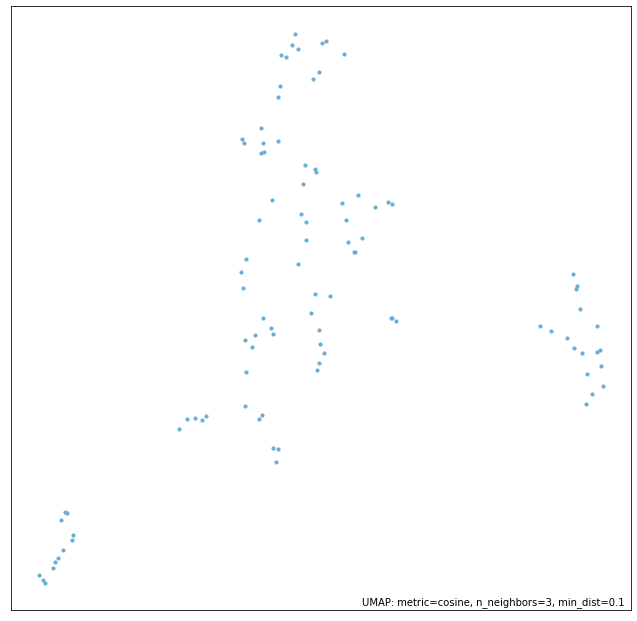

In [9]:
umap.plot.points(mapper)

In [15]:
model = NMF(n_components=4, init='random', random_state=0, max_iter=400)
W = model.fit_transform(abs(mars_zstat_df.T + abs(mars_zstat_df.T)/2))
H = model.components_

In [16]:
W.shape

(100, 4)

In [17]:
mapper = umap.UMAP(n_neighbors=3, metric="cosine").fit(W)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

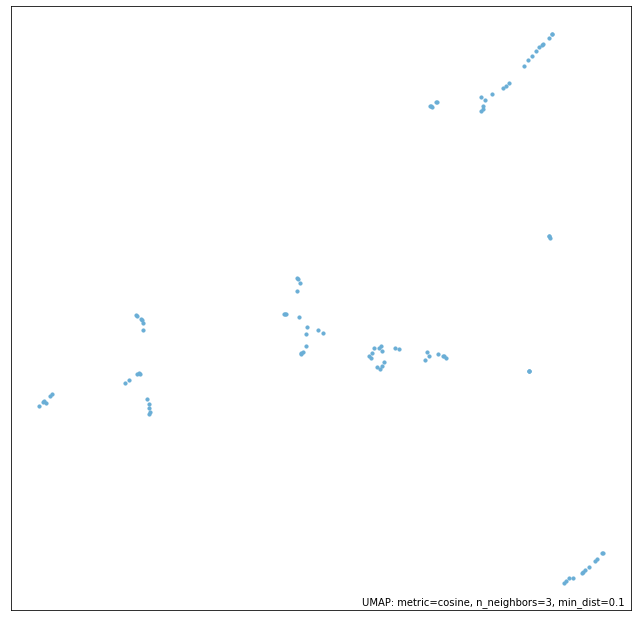

In [18]:
umap.plot.points(mapper)